In [1]:

# Python Project Template
# Remember to df.to_csv("periodic_backup.csv")   OFTEN!!!
# df.to_csv("auto_data_uk.csv")

# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml 


# b) Load dataset
# Data Dictionary: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
df = pd.read_csv("https://raw.githubusercontent.com/fenago/introml/main/Life%20Expectancy%20Data.csv")

# df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/UCI_Credit_Card.csv")
# adult_census = pd.read_csv("https://github.com/fenago/MLEssentials2/blob/main/datasets/adult-census.csv?raw=true")

# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# Most models assume linear; for non-linear/quadratic better to use xgboost or neural net
# XGBoost and LightGBM are the most common models in Kaggle
# https://www.amazon.co.uk/Data-Analytics-Python-ERNESTO-LEE/dp/B093R5TMDS#detailBullets_feature_div
# Binary Classification is the MOST COMMON use case


In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

In [5]:
# BLUF - Bottom Line Up Front
# Today:  Outliers, Feature Selection
# BUT - before that... let's create a quick template for building models... Algorithm Harness
# Given a binary classification type of data build a template ML model quickly

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/classify/main/data/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [8]:
df.nunique()

Status          3
Seniority      47
Home            7
Time           11
Age            50
Marital         6
Records         2
Job             5
Expenses       94
Income        353
Assets        160
Debt          183
Amount        285
Price        1419
dtype: int64

In [9]:
df.corr()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
Status,1.000000,-0.260312,0.051025,0.099935,-0.094498,0.010535,0.278638,0.152722,0.029499,0.059807,0.032989,0.062401,0.153771,0.010297
Seniority,-0.260312,1.000000,-0.145878,-0.021320,0.505787,0.163433,-0.015674,-0.109339,0.125798,-0.034262,0.026380,0.005725,-0.007859,0.040922
Home,0.051025,-0.145878,1.000000,-0.020880,-0.270784,-0.260712,-0.013205,-0.032042,-0.334092,-0.022968,-0.020389,-0.043584,-0.019560,-0.026542
Time,0.099935,-0.021320,-0.020880,1.000000,-0.051966,0.049978,0.028094,-0.138454,-0.001059,-0.020246,-0.039491,-0.051170,0.431050,0.129796
Age,-0.094498,0.505787,-0.270784,-0.051966,1.000000,0.325652,0.060171,0.179447,0.248254,0.010653,0.053084,0.015971,0.028907,0.048739
Marital,0.010535,0.163433,-0.260712,0.049978,0.325652,1.000000,0.082440,0.034105,0.210315,0.004463,-0.007824,0.000985,0.054130,0.062537
Records,0.278638,-0.015674,-0.013205,0.028094,0.060171,0.082440,1.000000,0.033898,0.057329,0.034741,0.004926,0.008197,0.110349,0.085143
Job,0.152722,-0.109339,-0.032042,-0.138454,0.179447,0.034105,0.033898,1.000000,0.024170,0.102801,0.049138,0.029067,0.055833,0.056497
Expenses,0.029499,0.125798,-0.334092,-0.001059,0.248254,0.210315,0.057329,0.024170,1.000000,0.010664,-0.023255,-0.018899,0.048958,0.040162
Income,0.059807,-0.034262,-0.022968,-0.020246,0.010653,0.004463,0.034741,0.102801,0.010664,1.000000,0.092042,0.116399,0.019659,0.023088


In [13]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [14]:
# 999999999 - several values of that in the income, assets, and debt column
for c in ['income', 'assets','debt']:
  df[c] = df[c].replace(to_replace=99999999,value=np.nan)


In [15]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129.0,0.0,0.0,800,846
1,1,17,1,60,58,3,1,1,48,131.0,0.0,0.0,1000,1658
2,2,10,2,36,46,2,2,3,90,200.0,3000.0,0.0,2000,2985
3,1,0,1,60,24,1,1,1,63,182.0,2500.0,0.0,900,1325
4,1,0,1,36,26,1,1,1,46,107.0,0.0,0.0,310,910


In [21]:
df.nunique()

status          3
seniority      47
home            7
time           11
age            50
marital         6
records         2
job             5
expenses       94
income        352
assets        159
debt          182
amount        285
price        1419
dtype: int64

In [22]:
df['status'].unique()

array([1, 2, 0], dtype=int64)

In [23]:
df['status'].value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [24]:
df=df[df.status !=0]

In [26]:
df['status'].value_counts()

1    3200
2    1254
Name: status, dtype: int64

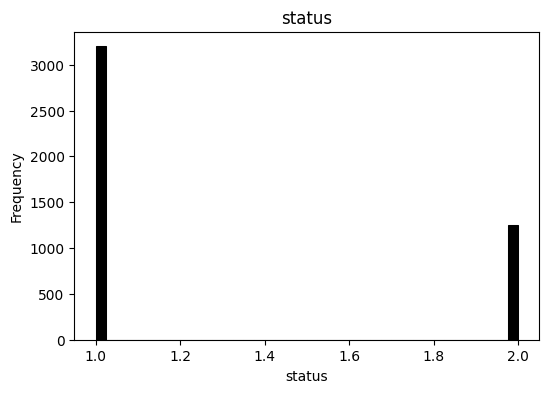

In [27]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.status, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('status')
plt.title('status')

#plt.show()

In [29]:
#nulls exist because we removed 999 with nulls
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=11)

#data leakage - insidious problem in ML
# split the data into training and learning fastest and then treat each set 
# separately i.e. nulll handling later after splitting
# another problem is stratification : because all random values which are 2 could be in training set and not in testing set
# make a stratified split is an advanced way to split
# test data should be raw i.e. without pre-processing
# in the real world you wont pre-process the real data i.e. test data
# that way you wont bias the test data
# test should be closest to real world data

#data leakage will make predictions that are accurate on the training data but not when the model is used to make predictions on new data.
# but test data will have the dependent variable value already unlike real world

df_train_full=df_train_full.fillna(0)
df_test=df_test.fillna(0)

len(df_train_full)
len(df_test)

891

In [40]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.status).values
y_test = (df_test.status).values
del df_train_full['status']
del df_test['status']

In [41]:
len(y_train),len(y_test)

(3563, 891)

In [43]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

#DictVectorizer needs a dict, so convert into dict. dictvectorizer converts strings to intergers 
# i.e. it is .map({'string':'int'})

In [45]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)
#dictionary verctoriszer is OHE : alternative to get_dummies
#both dictvectorizer and pandas.get_dummies are OHE; pandas.get_dummies is more manual - have to do one column at a time


In [46]:
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home',
 'income',
 'job',
 'marital',
 'price',
 'records',
 'seniority',
 'time']

* AUTOML SOLUTION BELOW *

LR: 0.807315 (0.030664)
Score for each of the 10 K-fold tests:  [0.81248451 0.81951296 0.82553373 0.77251603 0.84063745 0.82276608
 0.84519744 0.73858293 0.79872503 0.79719235]
LogisticRegression(solver='liblinear')
	Training time: 0.058s
	Prediction time: 0.566s

LDA: 0.811220 (0.037792)
Score for each of the 10 K-fold tests:  [0.81215401 0.81070394 0.84204827 0.74551282 0.84860558 0.82223487
 0.87167581 0.7501942  0.8081452  0.80092593]
LinearDiscriminantAnalysis()
	Training time: 0.013s
	Prediction time: 0.129s

KNN: 0.664181 (0.022899)
Score for each of the 10 K-fold tests:  [0.66198463 0.67541696 0.61593054 0.62670272 0.676513   0.6732878
 0.6726275  0.69469316 0.67011126 0.6745445 ]
KNeighborsClassifier()
	Training time: 0.014s
	Prediction time: 0.222s

CART: 0.643770 (0.025119)
Score for each of the 10 K-fold tests:  [0.64820706 0.66925065 0.65468363 0.60641026 0.63849364 0.65896414
 0.67913197 0.59278793 0.64763684 0.6421371 ]
DecisionTreeClassifier()
	Training time: 0.035s
	Pr

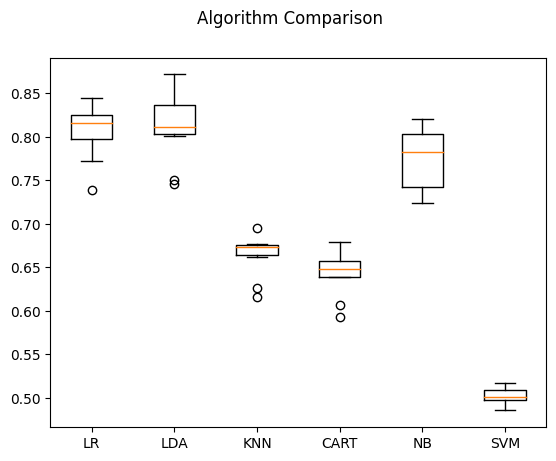

In [47]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [48]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [49]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [51]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home',
 'income',
 'job',
 'marital',
 'price',
 'records',
 'seniority',
 'time']

In [52]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [53]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.093 age
0.114 amount
0.078 assets
0.022 debt
0.055 expenses
0.028 home
0.181 income
0.037 job
0.019 marital
0.124 price
0.084 records
0.123 seniority
0.042 time


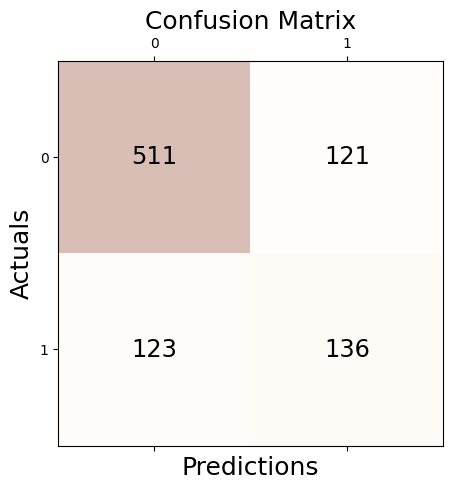

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Confusion Matrix is the 2 by 2 between actual and model prediction
# model accuracy is not everything
# which quadrant of confusion matrix are you trying to optimize - hyperparameter training important to increase that quadrant

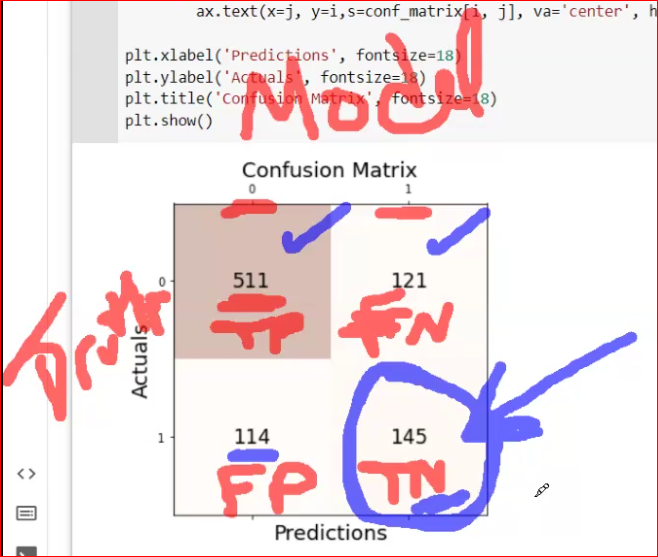

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81       632
           2       0.53      0.53      0.53       259

    accuracy                           0.73       891
   macro avg       0.67      0.67      0.67       891
weighted avg       0.73      0.73      0.73       891



In [57]:
# Take a peek at your predictions:
# Take a look at the first 10 rows and compare the predictions.
pred_y = dt.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

The first 10 prediction [1 2 1 1 1 1 1 1 1 2]
The real first 10 labels [2 1 1 1 2 1 1 1 1 1]


### Predict on one record

In [58]:
# How to make predictions with BRAND NEW VALUES
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [59]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1043,3,1,36,32,1,1,3,35,0.0,0.0,0.0,950,1350


In [60]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

{'seniority': 12,
 'home': 2,
 'time': 60,
 'age': 28,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 45,
 'income': 167.0,
 'assets': 3000.0,
 'debt': 1750.0,
 'amount': 250,
 'price': 1188}

In [61]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(21).to_dict('records')[0]

{'seniority': 22,
 'home': 2,
 'time': 48,
 'age': 48,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 60,
 'income': 110.0,
 'assets': 3000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1460}

In [62]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[213]].to_dict('records')[0]
actual = y_train[[213]]

In [63]:
item


{'seniority': 12,
 'home': 2,
 'time': 60,
 'age': 28,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 45,
 'income': 167.0,
 'assets': 3000.0,
 'debt': 1750.0,
 'amount': 250,
 'price': 1188}

In [64]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [65]:
# The item to be predicted is passed in. Probability Model 
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [66]:
model_prediction(item,dv,dt)

1

In [67]:
actual

array([1], dtype=int64)

In [ ]:
# Recividism http://ernesto.net/research/
# Most bias is in bias of training data
# can you predict race or gender based on data, then data is biased

In [68]:
model_prediction_proba(item,dv,dt)

0.0

In [69]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[2]].to_dict('records')[0]

{'seniority': 2,
 'home': 5,
 'time': 36,
 'age': 19,
 'marital': 2,
 'records': 1,
 'job': 1,
 'expenses': 35,
 'income': 162.0,
 'assets': 4000.0,
 'debt': 100.0,
 'amount': 400,
 'price': 570}

In [74]:
#TINKER TO CREATE A SIMULATED DATA

# The list above can be copied into here.  Take everything after a " : " and put it in a [] so you can pass it in as a pd.DF
# create a DataFrame by transforming scalar values to list   (toggle the weekend)

myItem = {'seniority': [1],
 'home': [4],
 'time': [136],
 'age': [19],
 'marital': [1],
 'records': [1],
 'job': [2],
 'expenses': [35],
 'income': [1162.0],
 'assets': [4000.0],
 'debt': [100.0],
 'amount': [400],
 'price': [570]}


In [75]:
newDF = pd.DataFrame.from_dict(myItem)

In [76]:
newDF.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,4,136,19,1,1,2,35,1162.0,4000.0,100.0,400,570


In [78]:
item = newDF.to_dict('records')[0]

In [79]:
model_prediction(item,dv,dt)

1

## HyperParameter Tuning

In [80]:
# Hyperparameter Tuning... light...
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [1, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4]},
             verbose=1)

In [82]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters


DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [83]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [84]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.feature_names_,
 class_names=None,
 filled=True,
)

In [85]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
